In [1]:
%matplotlib inline
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
from pylab import plot, show, text
import datetime
import matplotlib.dates as mdates
import pylab

In [2]:
# load as Pandas dataframe
df_users = pd.read_csv('takehome_users.csv', encoding='latin-1')

# look at basic column descriptions
df_users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [3]:
# put zero for NaN values
df_users = df_users.fillna(0)

In [4]:
# peek at the dataframe
df_users.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0


In [5]:
# what organization has the most users?
# ANSWER: most users belong to organization id: 1 -> 10 except 8
df_users.org_id.value_counts().head(10)

0     319
1     233
2     201
3     168
4     159
6     138
5     128
9     124
7     119
10    104
Name: org_id, dtype: int64

In [6]:
# who invited most users
df_users.invited_by_user_id.value_counts().head(10)

0.0        5583
10741.0      13
2527.0       12
1525.0       11
2308.0       11
11770.0      11
4612.0       10
7012.0       10
10481.0      10
4803.0       10
Name: invited_by_user_id, dtype: int64

In [8]:
# who are these users who invited the most users , 11770
df_users[(df_users['object_id'] == 10741) | (df_users['object_id'] == 2527) | (df_users['object_id'] == 2308)| 
         (df_users['object_id'] == 1525)| (df_users['object_id'] == 11770)]['name']

1524         Kay Alice
2307       Melo Leonor
2526     Ribeiro Diego
10740    Tennant Piper
11769    Barbosa Tiago
Name: name, dtype: object

In [9]:
# check if there are blank email
print(len(df_users[df_users.email == None]))

0


In [10]:
# how many opted in to mailing list
df_users.opted_in_to_mailing_list.value_counts()

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

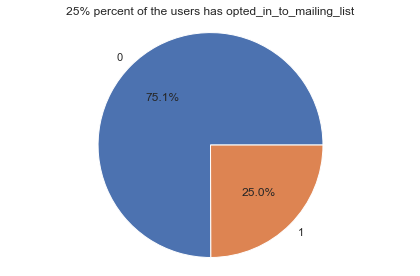

In [11]:
# Create a pie chart

# create dataframe for creation source
df_mail = df_users.opted_in_to_mailing_list.value_counts()
df_mail = df_mail.reset_index()

# Put parameter values
plt.pie(
    df_mail['opted_in_to_mailing_list'],
    labels=df_mail['index'],
    shadow=False,
    startangle=0,
    autopct='%1.1f%%',
    )

# Add title
plt.title('25% percent of the users has opted_in_to_mailing_list')
plt.axis('equal')

# Display plot 
plt.tight_layout()
plt.show()

In [12]:
# how many enabled for marketing drip
df_users.enabled_for_marketing_drip.value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

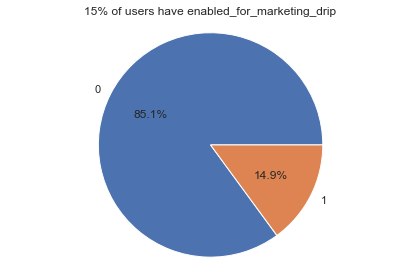

In [13]:
# Create a pie chart

# create dataframe for creation source
df_drip = df_users.enabled_for_marketing_drip.value_counts()
df_drip = df_drip.reset_index()

# Put parameter values
plt.pie(
    df_drip['enabled_for_marketing_drip'],
    labels=df_drip['index'],
    shadow=False,
    startangle=0,
    autopct='%1.1f%%',
    )

# Add title
plt.title('15% of users have enabled_for_marketing_drip')
plt.axis('equal')

# Display plot
plt.tight_layout()
plt.show()

In [14]:
#creation source distribution
df_users.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

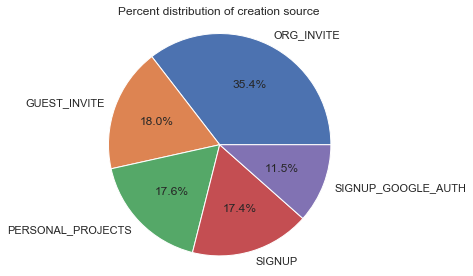

In [15]:
# Create a pie chart

# create dataframe for creation source
df_source = df_users.creation_source.value_counts()
df_source = df_source.reset_index()

# Put parameter values
plt.pie(
    df_source['creation_source'],
    labels=df_source['index'],
    shadow=False,
    startangle=0,
    autopct='%1.1f%%',
    )

# Add title
plt.title('Percent distribution of creation source')
plt.axis('equal')

# Display plot
plt.tight_layout()
plt.show()

In [16]:
# read file into dataframe
df_engage = pd.read_csv('takehome_user_engagement.csv')
df_engage.head(3)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1


In [17]:
# top 10 active users (may or may not be adopted users)
df_engage.user_id.value_counts().head(10)

3623    606
906     600
1811    593
7590    590
8068    585
9402    581
4022    580
3269    566
9312    547
7210    545
Name: user_id, dtype: int64

In [18]:
# who are these top 3 users?
df_users[(df_users['object_id'] == 3623) | (df_users['object_id'] == 906) | (df_users['object_id'] == 1811)]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
905,906,2012-06-17 22:49:52,Becker Jessika,JessikaBecker@gmail.com,SIGNUP_GOOGLE_AUTH,1.401922e+09,0,0,358,0.0
1810,1811,2012-06-19 16:09:31,Carvalho Eduardo,EduardoCunhaCarvalho@gmail.com,SIGNUP_GOOGLE_AUTH,1.400948e+09,1,1,33,0.0
3622,3623,2012-06-25 14:34:33,Melo Vitória,VitoriaAlvesMelo@jourrapide.com,ORG_INVITE,1.401201e+09,0,0,364,3623.0


In [19]:
# convert string time stamp into datetime
df_engage['time_stamp'] = pd.to_datetime(df_engage['time_stamp'])

# change index to time_stamp column for timegrouper function (later on)
df_engage.index = pd.to_datetime(df_engage.time_stamp, unit='D')

In [21]:
# create dataframe with users that has logged into the product on three separate days in at least one sevenday period
df_adoption = df_engage.groupby(['user_id', pd.Grouper(freq='7D')]).filter(lambda x: len(x)>1).groupby('user_id').sum()

# reset index
df_adoption = df_adoption.reset_index()

In [22]:
# peek at some data 
df_adoption.head(3)

,user_id,visited
0,2,4
1,10,277
2,20,2


In [23]:
# merge users and adopted users dataframe
df = df_users.merge(df_adoption, left_on='object_id', right_on='user_id', how='outer')

# drop column user_id since it is duplicate with object_id
df.drop('user_id', axis=1, inplace=True)

# replace NaN with zero
df = df.fillna(0)

from datetime import datetime
# convert unix timestamp to datetime
df['last_session_creation_time'] = df['last_session_creation_time'].apply(
    lambda x: datetime.strptime(str(datetime.fromtimestamp(float(int(x)))), '%Y-%m-%d %H:%M:%S'))
df['creation_time'] = df['creation_time'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))

#calculate active days
df['days_since_signup'] = df['last_session_creation_time'] - df['creation_time']
df['days_since_signup'] = df['days_since_signup'].apply(lambda x: abs(x.total_seconds()/60/60/24/30)) 

#convert creation_source into numeric values
df['creation_source']= df['creation_source'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

# create column if us
df['adopted_user']=df['visited'].apply(lambda x: int(x > 0))

# column visited is not needed
df.drop('visited', axis=1, inplace=True)

df.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,days_since_signup,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,0,2014-04-21 22:53:30,1,0,11,10803.0,0.006944,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1,2014-03-30 22:45:04,0,0,1,316.0,4.526389,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1,2013-03-19 18:14:52,0,0,94,1525.0,0.006944,0


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#construct the dataset X, y
X = df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'days_since_signup']]
y = (df.adopted_user == 1)

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X.values, y.values, test_size=0.20, random_state=5)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print("Accuracy score: ", accuracy_score(clf.predict(Xtestlr), ytestlr))

# Print importance of each features
clf.fit(Xlr / np.std(Xlr, 0), ylr)
print("Regression coefficients: ", clf.coef_)
print("Intecept: ", clf.intercept_) 
print("Column names: ", (X.columns.values))

Accuracy score:  0.8395833333333333
Regression coefficients:  [[-0.13656331  0.03903792 -0.01274301 -1.59388968]]
Intecept:  [-1.05498164]
Column names:  ['creation_source' 'opted_in_to_mailing_list' 'enabled_for_marketing_drip'
 'days_since_signup']


# Results/Interpretation/Further Research:

Results:
I used the algorithm Logistics Regression since the target variable is binary (0, 1) if the user is adopted (1) or not (0). The features are 'creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'days_since_signup'. Accuracy score is 83.75% and the regression coefficients are [[-0.1408732 0.03920644 -0.01876419 -1.59402912]].


Interpretation:
Creation source most important is Org invite and least is signup google auth. Having a high value on creation source is 0.14 unit in the odds of being an adopted user.
Opted in mailing list is 0.03 unit in the probability that the user becomes adopted user.
Enabled for marketing drip is .02 unit in the likelihood of being an adopted user.
Number of days since signup is 1.6 unit in the chance that user is an adopted user


Further research/data:
(Assuming that Relax Inc. is a spa facility) Add user information such as gender, age, location, salary range and number of friends/co-workers/relatives who are also member. Also, user profile on social network and their outlook regarding about health and fitness can also help to improve this prediction.